## Read file and Plot using RAW wave module

In [11]:
import wave
import numpy as np
import array
import matplotlib.pyplot as plt

In [12]:
with wave.open("./files/example_file.wav") as wav_file:
    print(wav_file)

In [22]:
with wave.open("./files/example_file.wav") as wav_file:
    metadata = wav_file.getparams()
    
    nchannels = metadata.nchannels         # Number of channels
    sampwidth = metadata.sampwidth         # Sample width (in bytes)
    framerate = metadata.framerate         # Frame rate (samples per second)
    nframes = metadata.nframes             # Number of audio frames
    
    duration = duration = nframes / float(framerate)
    
    print(metadata)
    print("Duration: ", duration)

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=262094, comptype='NONE', compname='not compressed')
Duration:  5.9431746031746036


In [14]:
with wave.open("./files/example_file.wav") as wav_file:
    frames = wav_file.readframes(5)
    print(frames)

b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x00\xff\xff'


In [15]:
# Process as mono sound (1 channel)
with wave.open("./files/example_file.wav") as wav_file:
    frames = wav_file.readframes(5)
    audio_data = array.array('h', frames)
    print(audio_data)

array('h', [0, 0, 0, 0, 0, 0, 0, 0, 1, -1])


In [16]:
# Process as stereo sound (2 channel)
with wave.open("./files/example_file.wav") as wav_file:
    frames = wav_file.readframes(nframes)
    audio_data = np.frombuffer(frames, dtype=np.int16)
    audio_data = np.reshape(audio_data, (-1, 2))
    
    normalized_amplitudes = audio_data / (2 ** 15)

    print(audio_data[:20])
    print(normalized_amplitudes[:20])

[[ 0  0]
 [ 0  0]
 [ 0  0]
 [ 0  0]
 [ 1 -1]
 [-2  2]
 [ 3 -2]
 [-4  2]
 [ 3 -3]
 [ 0  3]
 [-2 -2]
 [ 3  2]
 [-3 -2]
 [ 1  2]
 [ 1 -3]
 [-2  4]
 [ 2 -4]
 [-1  3]
 [ 0 -1]
 [ 0  0]]
[[ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00]
 [ 3.05175781e-05 -3.05175781e-05]
 [-6.10351562e-05  6.10351562e-05]
 [ 9.15527344e-05 -6.10351562e-05]
 [-1.22070312e-04  6.10351562e-05]
 [ 9.15527344e-05 -9.15527344e-05]
 [ 0.00000000e+00  9.15527344e-05]
 [-6.10351562e-05 -6.10351562e-05]
 [ 9.15527344e-05  6.10351562e-05]
 [-9.15527344e-05 -6.10351562e-05]
 [ 3.05175781e-05  6.10351562e-05]
 [ 3.05175781e-05 -9.15527344e-05]
 [-6.10351562e-05  1.22070312e-04]
 [ 6.10351562e-05 -1.22070312e-04]
 [-3.05175781e-05  9.15527344e-05]
 [ 0.00000000e+00 -3.05175781e-05]
 [ 0.00000000e+00  0.00000000e+00]]


In [17]:
def get_audio_data(frames, nchannels):
    # Here, we use dtype=np.int16 because we are assuming 16-bit audio
    audio_data = np.frombuffer(frames, dtype=np.int16)
    normalized_audio = audio_data / np.max(np.abs(audio_data))

    # If stereo, split into two channels
    if nchannels == 2:
        # Reshape the array to separate the two channels (left and right)
        normalized_audio = normalized_audio.reshape(-1, 2)
        left_channel = normalized_audio[:, 0]  # Left channel
        right_channel = normalized_audio[:, 1]  # Right channel
        print("Stereo file with two channels processed.")
    else:
        print("Mono file processed.")

    # print(normalized_audio[:5])
    return normalized_audio

Stereo file with two channels processed.


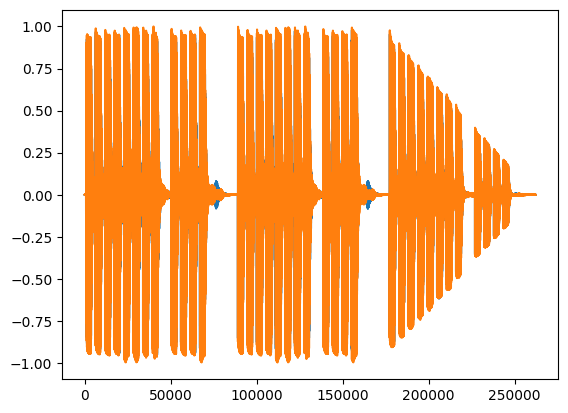

In [18]:
audio_data = get_audio_data(frames=frames, nchannels=2)
# print(audio_data)

plt.plot(audio_data)  # Plot both two channels

## Read file and Plot using Scipy

/var/folders/lr/77q7001j7ts8dyg69j0vmc480000gn/T/ipykernel_20536/1054014587.py:7: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, x = wavfile.read('./files/example_file.wav')


Sampling Frequency:  44100
Sapmple Points:  [[ 0  0]
 [ 0  0]
 [ 0  0]
 ...
 [-2 -2]
 [ 0  2]
 [ 2 -2]]
Shape of points:  (262094, 2)
Number of sample data in each block:  1014
Number of Blocks:  258


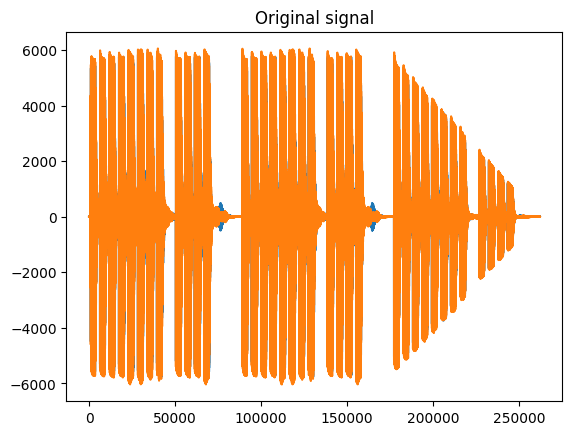

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

######## read clean speech file
# fs=sampling frequency, x=sample points (the sampled data in y)
fs, x = wavfile.read('./files/example_file.wav')
print("Sampling Frequency: ", fs)
print("Sapmple Points: ", x)
print("Shape of points: ", x.shape)


# block size calculation
block = int(0.023 * fs)  # block = number of sample data in each block
n = len(x) // block  # number of blocks
print("Number of sample data in each block: ", block)
print("Number of Blocks: ", n)

# truncate the signal to be an integer multiple of the block size
x = x[:block * n]   # block * n = 1014 * 256 = 259584

# plot the original signal
plt.figure()
plt.plot(x)
plt.title('Original signal')
plt.show()

The block size is calculated by multiplying the sampling frequency (fs) by 0.023. This represents the number of sample points that correspond to a block of 23 milliseconds (0.023 seconds) of audio. For example, if the sampling frequency is 16,000 Hz, then a block of 0.023 seconds would contain 0.023 * 16000 = 368 sample points.

Q: Should we need to use block? <br>
A:                              <br>
Q: What should be the size of the block? like here we use 0.023 <br>
A:                               <br>
Q: There is two types of normalization? divide by 2**15 or np.max(np.abs(audio_data)). What should I use? <br>
A:                               <br>

2510